In [1]:
import pandas as pd

df = pd.read_json('data/5000_threads.json')
df.head()

,url,thread_name,init_post,comments
0,https://us.forums.blizzard.com/en/wow/t/player...,Players vs Developers,It hit me earlier today when I was wondering w...,[…pretty much.I don’t raid or dungeon so I hav...
1,https://us.forums.blizzard.com/en/wow/t/no-mot...,No Motivation for HoA Skills,The statement “it’s Blizzard game they can do ...,[More like the the devs hear us but don’t care...
2,https://us.forums.blizzard.com/en/wow/t/what-w...,What Would be the Most Jump-the-Shark Way to E...,Basically title.Allow us to use our whistle an...,[OMG YES! Though Blizz won’t do it because th...
3,https://us.forums.blizzard.com/en/wow/t/sugges...,Suggestion: Allow us to upgrade our Flight Mas...,Here is my submission.After the defeat of Azsh...,[We find out Sylvanas is pregnant with Anduin’...
4,https://us.forums.blizzard.com/en/wow/t/6-mont...,6 Months Was Long Enough,BFA released 7 months ago. I’ve experienced th...,[I agree on the time frame. I as well feel the...


In [2]:
full_text = []

for index, row in df.iterrows():
    full_text.append(row['init_post'])
    full_text += row['comments']

In [31]:
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()


text_length = []
token_list = []
for comment in full_text:
    tokens = [token.lower() for token in tokenizer.tokenize(comment) if token not in stop_words and token.isalpha()]
    text_length.append(len(tokenizer.tokenize(comment)))
    token_list+= tokens

In [32]:
from nltk.probability import FreqDist

fdist = FreqDist(token_list)

In [35]:
fdist.most_common(20)

[('i', 296095),
 ('like', 59501),
 ('people', 45441),
 ('would', 43740),
 ('get', 41649),
 ('one', 36382),
 ('game', 35788),
 ('it', 32500),
 ('time', 30057),
 ('the', 29870),
 ('even', 26862),
 ('think', 26544),
 ('horde', 25646),
 ('you', 24215),
 ('want', 23458),
 ('alliance', 22635),
 ('really', 22511),
 ('make', 21877),
 ('know', 20081),
 ('see', 19838)]

In [4]:
import numpy as np

text_length = np.array(text_length)

In [12]:
print("The average number of tokens for a comment is {:.3f}".format(text_length.mean()))
print("The std for the number of tokens for a comment is {:.3f}".format(text_length.std()))

The average number of tokens for a comment is 46.350
The std for the number of tokens for a comment is 64.145


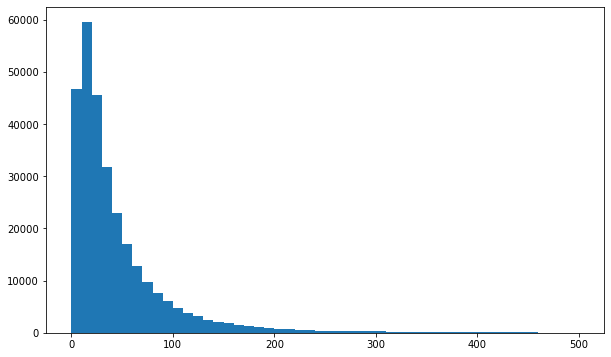

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(text_length, bins=50, range=[0,500])
plt.show()